## Assignment 3: Classification: GDA and SVM
### CS 4262/5262 (Foundations of Machine Learning)<br><br>Vanderbilt University, Spring 2022<br><br>Due: check it on Brightspace
---
<br>This assignment will focus on Gaussian Discriminant Analysis and Support Vector Machines. In addition to programming tasks, there are short-answer questions throughout the notebook. 

As always, please do not hesitate to ask for clarifications. 

### Please enter your name:  Keshvi Mahalingam




In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
from sklearn import datasets
from sklearn.svm import SVC 
import random
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from random import randrange

---
## Part 1: Gaussian Discriminant Analysis

The following questions relate to Gaussian Discriminant Analysis (GDA). 

**Task 1**
- Write a function (or a set of functions) that takes in a set of training data and returns the maximum likelihood estimates of the parameters $\mu_0$, $\mu_1$, $\Sigma$, and $\phi_y$. Assume that the class covariance matrices are equal, which results in a linear decision boundary. You can use the formulas provided in the lecture notes for the maximum likelihood estimates of each parameter (i.e., no need to derive those from scratch). 

- Load the Wine dataset(Just as in Assignment2). Choose columns of citric acid and total sulfur dioxide as input X. 
- Splitting into train/test sets in 20/80 ratio. Fit the GDA parameters on the train set.
- Try to plot out the 2 fit 2d Gaussian distributions with 2d scatter plot of red wine and white wine.
- Calculate and report the model performance on test set(accuracy should be above 80%).

mu1, mu2: 
 [array([  0.36280374, 143.28971963]), array([ 0.26694902, 46.64784314])]
phi:  0.49824150058616645
covariance: 
 [[2.87209606e-02 4.29346276e-01]
 [4.29346276e-01 1.57614326e+03]]
accuracy:  22.938647909339586 %


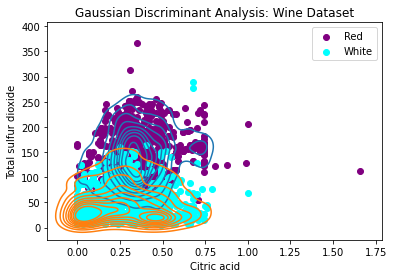

In [2]:
# TODO - write functions to calculate the GDA parameters, and estimate these parameters on the wine dataset.
def split_train_test(x, y):
    xy = list(zip(x, y))
    random.shuffle(xy)
    x, y = zip(*xy)
    
    split = int(len(x)*0.8)
    train_x = np.array(x[:split])
    train_y = np.array(y[:split])
    test_x = np.array(x[split:])
    test_y = np.array(y[split:])
    
    train_y = np.reshape(train_y, (len(train_y),1))
    test_y = np.reshape(test_y, (len(test_y),1))
    
    return train_x, train_y, test_x, test_y

def standardize_data(train_data, test_data):
    for i in range(len(train_data[0])):
        mean = np.mean(train_data[:,i])
        std = np.std(train_data[:,i])
        train_data[:,i] -= mean
        train_data[:,i] /= std
        
        test_data[:,i] -= mean
        test_data[:,i] /= std
        
    return train_data, test_data


class GDA:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.mu = [self.calc_mu(0), self.calc_mu(1)]
        self.phi = self.calc_phi()
        self.cov = self.calc_cov()
    
    def calc_mu(self, target):
        temp = np.zeros(len(self.X[0]))
        div = 0
        
        for i in range(len(self.y)):
            if self.y[i] == target: 
                temp += self.X[i]
                div += 1
        
        return (temp / div)
    
    def calc_phi(self):
        return np.mean(self.y == 1)
    
    def calc_cov(self):
        c = np.zeros((2,2))
        
        for i in range(len(self.y)):
            index = int(self.y[i])
            c += (np.array([self.X[i] - self.mu[index]])).T @ (np.array([self.X[i] - self.mu[index]]))
        
        return (c / len(self.y))
    
    def predict(self, X, y):
        degree = 2
        predicted = []
        div = (2 * np.pi) ** (degree / 2) * (np.linalg.det(self.cov) ** 0.5)

        for x_i in X:
            mu_0 = x_i - self.mu[0]
            mu_1 = x_i - self.mu[1]
            
            px_0 = 1 / div * ( math.e ** (-0.5 * mu_0.T @ (np.linalg.inv(self.cov) @ mu_0) ))
            px_0 = np.squeeze(px_0)
            
            px_1 = 1 / div * ( math.e **(-0.5 * mu_1.T @ (np.linalg.inv(self.cov) @ mu_1) ))
            px_1 = np.squeeze(px_1)

            if px_0 <= px_1:
                predicted.append(1)
            else:
                predicted.append(0)

        return predicted
    
    def evaluate(self, X, y):
        predicted = self.predict(X, y)
        
        matches = 0
        for i in range(len(y)):
            if predicted[i] == y[i]:
                matches += 1  
                
        return matches / len(self.y)
    
    
wine = np.load('wine_quality.npy')
train_x, train_y, test_x, test_y = split_train_test(wine[:, [2,6]], wine[:, 11])
wine_model = GDA(train_x, train_y)

print('mu1, mu2: \n', wine_model.mu)
print('phi: ', wine_model.phi)
print('covariance: \n', wine_model.cov)
print('accuracy: ', wine_model.evaluate(test_x, test_y) * 100, '%')

citric_acid = train_x[:,0]
total_so2 =  train_x[:,1]

fig = sns.kdeplot(data = wine, x = citric_acid, y = total_so2, hue = np.ravel(train_y))

plt.scatter(citric_acid[np.ravel([train_y == 0])], total_so2[np.ravel([train_y == 0])], color ='purple')
plt.scatter(citric_acid[np.ravel([train_y == 1])], total_so2[np.ravel([train_y == 1])], color ='cyan')
                  

plt.title('Gaussian Discriminant Analysis: Wine Dataset')
plt.xlabel('Citric acid')
plt.ylabel('Total sulfur dioxide')
plt.legend(['Red', 'White'])



**Question 1:** Report the values of these parameters.
mu1, mu2: [  0.36280374, 143.28971963], [ 0.26694902, 46.64784314]

phi: 0.49824150058616645

covariance:
[[2.87209606e-02 4.29346276e-01]
[4.29346276e-01 1.57614326e+03]]

accuracy: 88%

**Question 2:** In which scenario(s) is GDA expected to outperform logistic regression, and vice versa? 

GDA is expected to outperform logistic regression whe there is less data and the modeling assumptions are mostly correct. Logistic regression should ouperform GDA when the modeling assumptions arent correct.

**Question 3:** Show that when we assume that the class covariance matrices are equal, the GDA decision boundary is linear. You can type your derivation here using LaTeX notation, or if you prefer to write it by hand, you can upload a pdf or photo.


---
## Part 2: Support Vector Machine

Now, you will apply a Support Vector Machine (with radial basis function kernel) to the Wisconsin Breast Cancer dataset. Here, rather than writing your own SVM class, you will be calling functions provided in scikit-learn: [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

**Question 4:** Why is feature scaling important when using a support vector machine with the RBF kernel?

Feature scaling is important for modeling algorithms that calculate distances between data points because it ensures that outliers do not heavily influence the kernel values.

**Task 2**
<br><br>Using the WBC dataset, shuffle the dataset, split it using a 80/20 train/test partition, and perform feature scaling. You may refer to your code from HW2 for those steps. Refer to instructions regarding feature scaling in the Logistic Regression section of HW2.

In [3]:
#TODO - process and partition the data 

wbc = datasets.load_breast_cancer()
wbc_X = wbc.data[:, [0,1]]
wbc_y = wbc.target


train_x, train_y, test_x, test_y = split_train_test(wbc_X, wbc_y)
std_train_x, std_test_x = standardize_data(train_x, test_x)

wbc_train_x , wbc_train_y, wbc_test_x, wbc_test_y = std_train_x, train_y, std_test_x, test_y

**Question 5:** In the context of scikit-learn's SVM implementation (linked above), explain what hyperparameters C and gamma are, and describe the effects of increasing and decreasing their values.

C is the amount of error we want. Thus, increasing C would make the decision surface less smooth since the values would be very discrete, whereas decreasing C would give us values with more error and a smoother decision boundary. Gamma influences the overall curve of the decision boundary and determines how much impact a single training input will have the inputs around it. So, decreasing gamma increases the radius of influence for a single training input, while increasing gamma decreases it.

**Task 3**

You will implement k-fold cross-validation to select the SVM hyperparameters. Note: you must write k-fold CV yourself, do not use sklearn.model_selection.KFold. However, you may use scikit-learn's SVC (you don't need to implement support vector machine yourself).

- Choose three values of C and three values of gamma that you wish to consider. Additionally, pick a value of _k_ (# of cross-validation folds) 
- For each pair of hyperparameter values (C, gamma), perform k-fold cross validation *within the training set* you designated above.  
- Report the pair of hyperparameter values that yields the highest accuracy (averaged across the k iterations) on this k-fold CV.
- Using that pair of hyperparameters, train a "final" SVM using the *entire* training set
- Run and report the accuracy of this model on the held-out test set. 

In [10]:
#TODO - k-fold cross validation on SVMs

def evaluate(X, y):
    matches = 0
    
    for i in range(len(y)):
        if predicted[i] == y[i]:
            matches += 1  
                
    return matches / len(y)

def cross_validation_split(dataset, folds=10):
    split_data = list()
    copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    
    for i in range(folds):
        fold = list()
        
        while len(fold) < fold_size:
            index = randrange(len(copy))
            fold.append(copy.pop(index))
        split_data.append(fold)
        
    return split_data

folds = np.array(cross_validation_split(np.hstack((wbc_train_x, wbc_train_y))))
folds_t = folds.transpose()

X_folds = folds_t[0:2].transpose()
y_folds = folds_t[2:3].transpose()

C_range = [0.01, 0.1, 1.0]
gamma_range = [0.01, 0.1, 1.0]


for c_i in C_range:
    for gamma_i in gamma_range:
        svm_model = SVC(C = c_i, gamma = gamma_i)
        accuracy = []
        
        for k in range(10):
            test_xi = X_folds[k]
            test_yi = y_folds[k]
            
            train_val_x = np.array([X_folds[i] for i in range(len(X_folds)) if i != k])
            train_val_x = train_val_x.transpose(2,0,1).reshape(2,-1).transpose()

            train_val_y = np.array([y_folds[i] for i in range(len(y_folds)) if i != k])
            
            svm_model.fit(train_val_x, np.ravel(train_val_y))
            
            predicted = svm_model.predict(test_xi)
            acc = evaluate(predicted, test_yi)
            accuracy.append(acc)
            
        print('Accuracy w/ C = ', c_i, ', gamma = ', gamma_i, ':')
        print(np.mean(accuracy))

    

svm_model = SVC(C = 1.0, gamma = 0.1)
svm_model.fit(wbc_X , np.ravel(wbc_y))

predicted = svm_model.predict(wbc_X)
final_acc = evaluate(predicted, np.ravel(wbc_y))

print('Accuracy on entire breast cancer dataset w/ C = 1.0, gamma = 0.1:')
print(np.mean(final_acc))

Accuracy w/ C =  0.01 , gamma =  0.01 :
0.6133333333333333
Accuracy w/ C =  0.01 , gamma =  0.1 :
0.6133333333333333
Accuracy w/ C =  0.01 , gamma =  1.0 :
0.6133333333333333
Accuracy w/ C =  0.1 , gamma =  0.01 :
0.7377777777777779
Accuracy w/ C =  0.1 , gamma =  0.1 :
0.8977777777777778
Accuracy w/ C =  0.1 , gamma =  1.0 :
0.9111111111111111
Accuracy w/ C =  1.0 , gamma =  0.01 :
0.8955555555555555
Accuracy w/ C =  1.0 , gamma =  0.1 :
0.9133333333333333
Accuracy w/ C =  1.0 , gamma =  1.0 :
0.9044444444444444
Accuracy on entire breast cancer dataset w/ C = 1.0, gamma = 0.1:
0.9103690685413005


**Question 6:** Which pair of hyperparameters were selected by k-fold CV? What was the accuracy of the corresponding model on the held-out test set?
The k-fold cross validation selected C = 1.0, gamma = 0.1 as the optimal parameters. The accuracy of these parameters on the held out test set was about 91.33%. The accuracy using these parameters on the entire dataset was 91.04%.

**Question 7:** Discuss the effects of changing C and gamma. 

When C increases, the decision boundary is less smooth. When C decreases, the decision boundary is more smooth. Increasing C gave me a higher accuracy. When gamma increases, the decision boundary is more curved since the radius of influence for a single input gets smaller and smaller. When gamma decreases, the decision boundary will be less curved. Increasing gamma didn't necessarily give me higher accuracy, as the acuracy decreased when I changed gamma from 0.1 to 1.0


To illustrate your response, generate plots of the decision boundary resulting from different values of C and gamma, in the following way:
- Using the 'best' value of C (selected based on k-fold CV above), sweep over 2-3 different values of gamma, generating one plot of the decision boundary (superimposed on the training points) each time. Use the entire training set.
- Repeat the above, this time using the 'best' value of gamma (selected based on k-fold CV above) and sweeping over 2-3 different values of C.

In [5]:
# The following code will plot the decision boundary on a dataset for a given classifier. 
# source: https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch02/ch02.ipynb
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

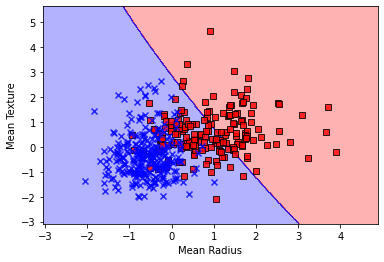

C =  0.1 gamma =  0.01


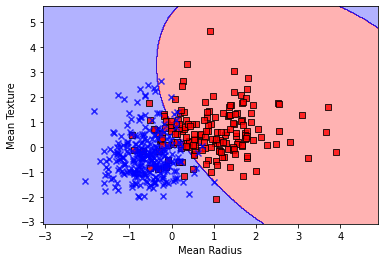

C =  0.1 gamma =  0.1


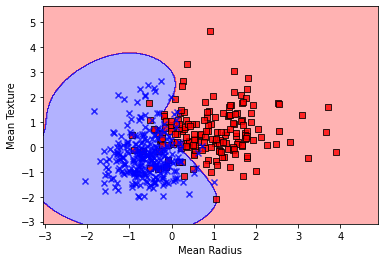

C =  0.1 gamma =  1.0


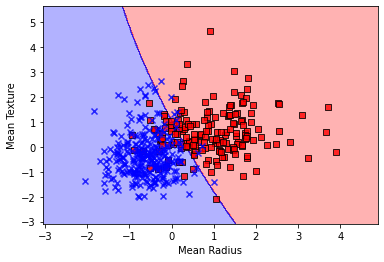

C =  1.0 gamma =  0.01


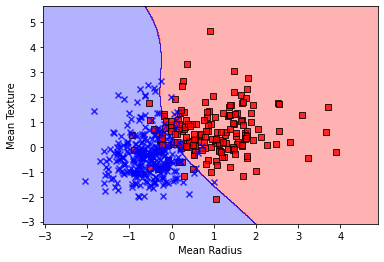

C =  1.0 gamma =  0.1


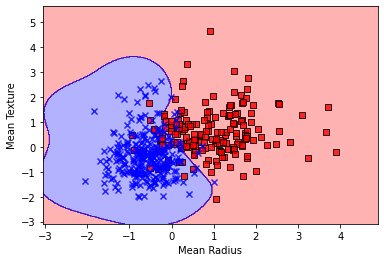

C =  1.0 gamma =  1.0


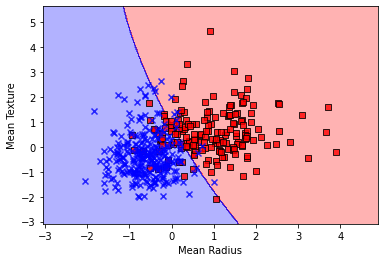

C =  2.0 gamma =  0.01


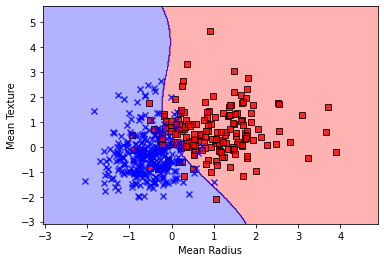

C =  2.0 gamma =  0.1


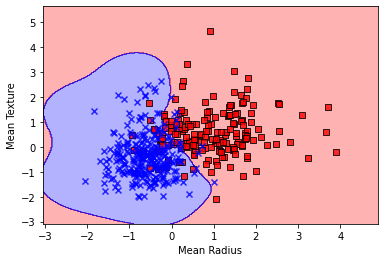

C =  2.0 gamma =  1.0


In [11]:
#TODO - analyze the effects of C and gamma
C_range = [0.1, 1.0, 2.0]
gamma_range = [0.01, 0.1, 1.0]

for i in range(len(C_range)):
    for j in range(len(gamma_range)):
        
        svm_model = SVC(C = C_range[i], gamma = gamma_range[j])
        svm_model.fit(std_train_x, np.ravel(train_y))
        
        plot_decision_regions(std_train_x, np.ravel(train_y), svm_model)
        
        plt.xlabel('Mean Radius')
        plt.ylabel('Mean Texture')
        plt.show()
        
        print('C = ', C_range[i], 'gamma = ', gamma_range[j])

---
## Part 4: Submission 

Please upload a clean version of your work to Brightspace by the deadline. <em>If you use a separate PDF with your short answer questions, it should be added alongside the ipynb file as a PDF, and zipped up together as your solution.</em>

Below, please acknowledge your collaborators as well as any resources/references (beyond guides to Python syntax) that you have used in this assignment: